In [1]:
import rasterio as rio
from rasterio.plot import show
from sklearn import cluster
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Open the image 
hv2020_raster = rio.open("LULC_Dataset/2020/Kharif/HV_2020_Kharif.tif")
print(hv2020_raster.meta)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 10980, 'height': 10980, 'count': 3, 'crs': CRS.from_epsg(32643), 'transform': Affine(10.0, 0.0, 799980.0,
       0.0, -10.0, 2000040.0)}


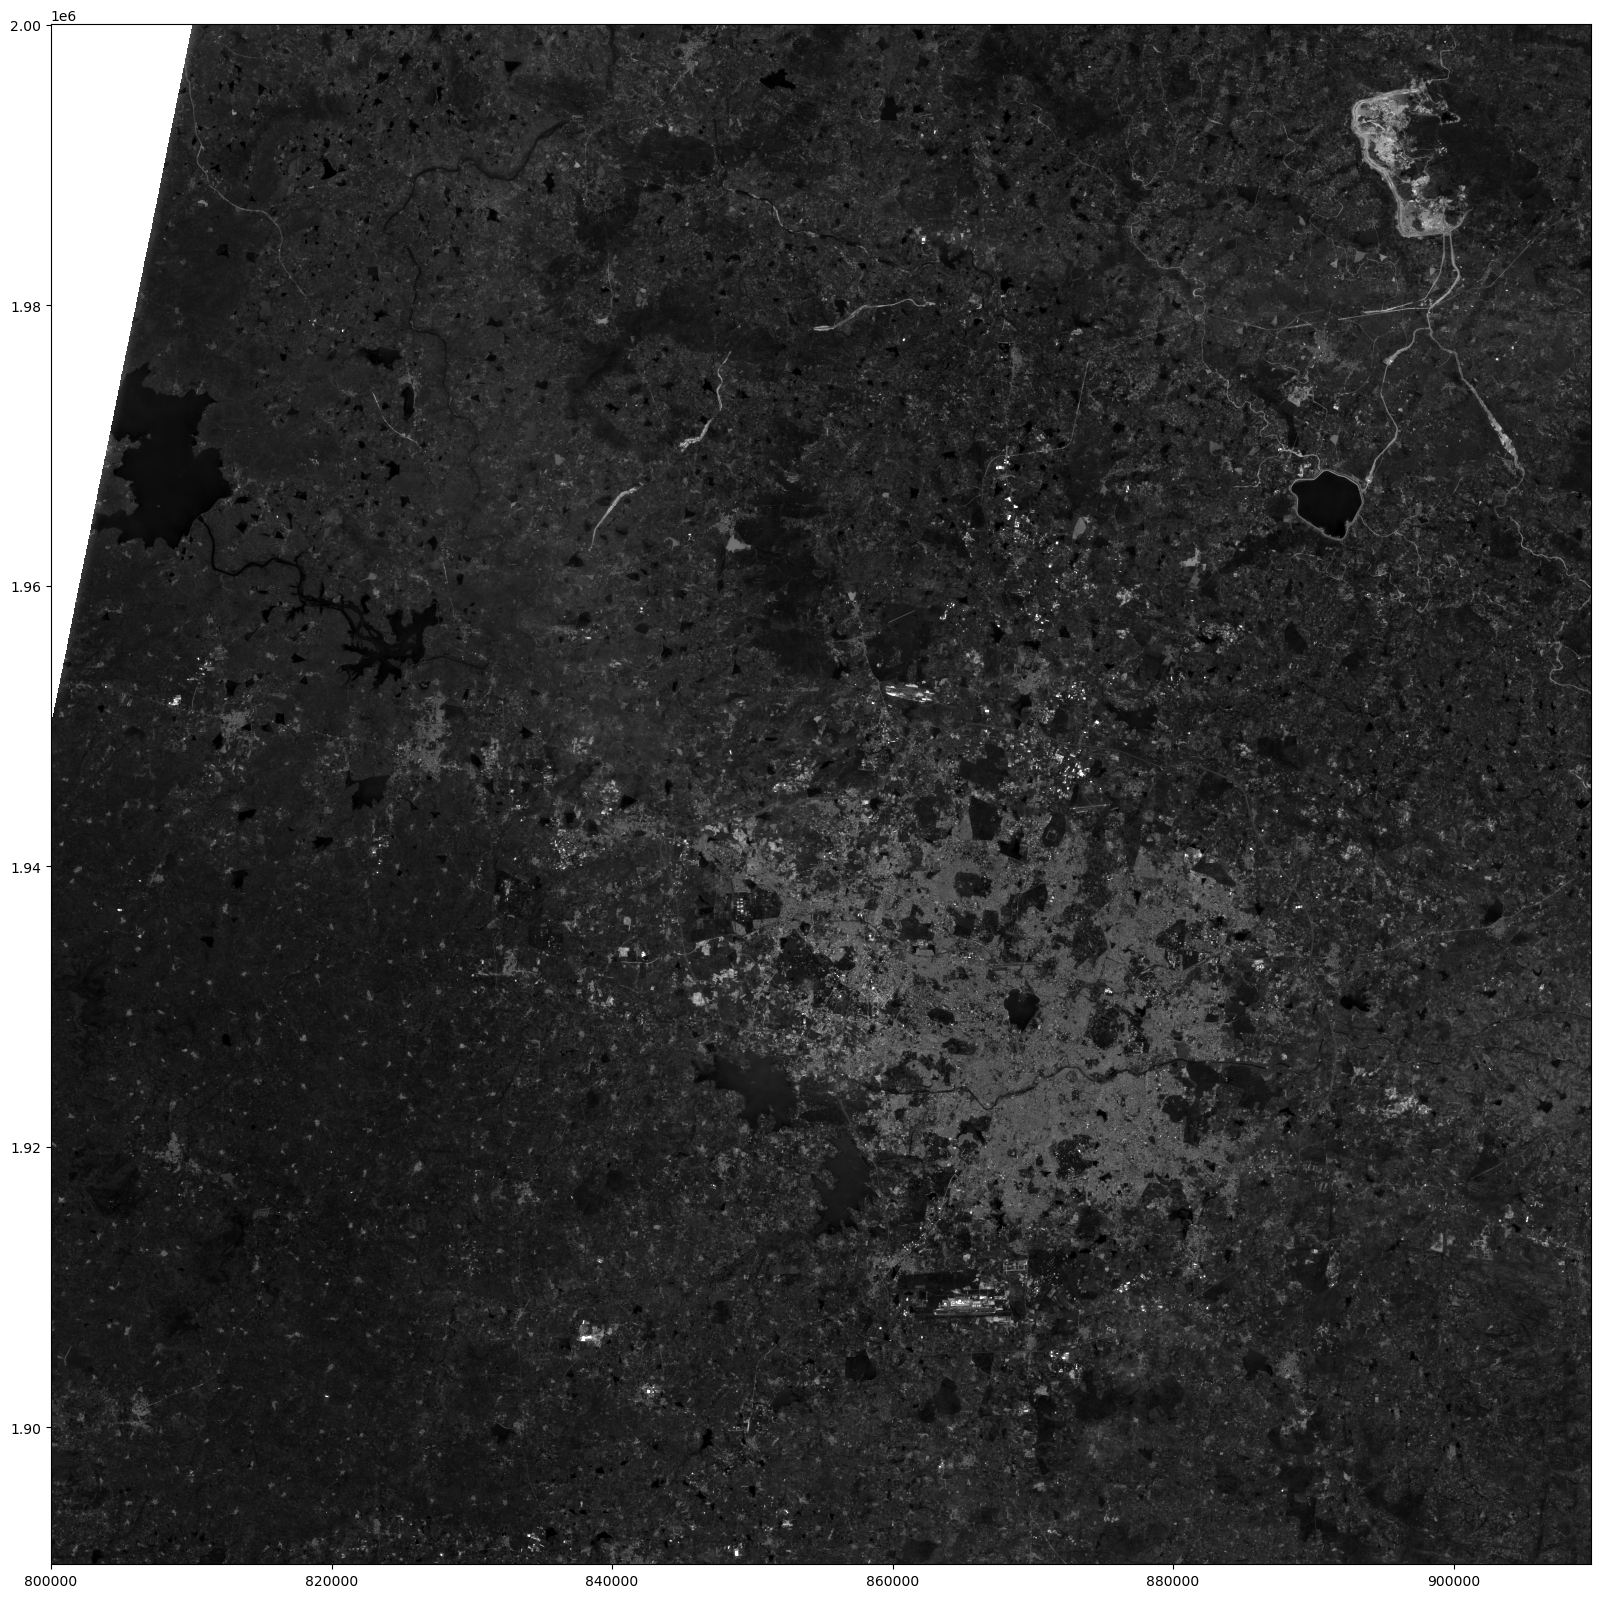

In [3]:
# Read, enhance and show the image
hv2020_arr = hv2020_raster.read() # read the opened image
vmin, vmax = np.nanpercentile(hv2020_arr, (5,95))  # 5-95% contrast stretch
# show the enhanced image
plt.figure(figsize=[20,20])
show(hv2020_raster, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [4]:
# create an empty array with same dimension and data type
imgxyb = np.empty((hv2020_raster.height, hv2020_raster.width, hv2020_raster.count), hv2020_raster.meta['dtype'])
# loop through the raster's bands to fill the empty array
for band in range(imgxyb.shape[2]):
    imgxyb[:,:,band] = hv2020_raster.read(band+1)

In [5]:
print(imgxyb.shape)

(10980, 10980, 3)


In [6]:
# convert to 1d array
img1d=imgxyb[:,:,:3].reshape((imgxyb.shape[0]*imgxyb.shape[1],imgxyb.shape[2]))

In [7]:
img1d.shape

(120560400, 3)

In [8]:
cl = cluster.KMeans(n_clusters=5) # create an object of the classifier
param = cl.fit(img1d) # train it
img_cl = cl.labels_ # get the labels of the classes
img_cl = img_cl.reshape(imgxyb[:,:,0].shape) # reshape labels to a 3d array (one band only)

C:\Users\visma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MemoryError: Unable to allocate 2.69 GiB for an array with shape (3, 120560400) and data type float64